### 0) 개요

* Kaggle "[Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview)" 선택
* 선택 사유 : 비정형 데이터(이미지 등) 기반의 분류 문제가 아니기 때문에 분석 수행 상의 어려움이 적음






### 1) 데이터 로드

##### 1-1) 데이터 불러오기

In [ ]:
# 라이브러리 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Kaggle API 실행 : https://m.blog.naver.com/comedu03/222429703891 참조
# 런타임 재실행 시 kaggle.json 파일 업로드 필요할 수 있음

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 데이터 다운로드

!pip install kaggle
!kaggle competitions download -c playground-series-s4e1
!unzip playground-series-s4e1.zip

data = pd.read_csv("test.csv", index_col="id")
sub = pd.read_csv("train.csv", index_col="id")

data.shape
sub.shape

playground-series-s4e1.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  playground-series-s4e1.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


(165034, 13)

##### 1-2) 데이터 확인

* 범주형 변수
  * Geography, Gender, HasCrCard, IsActiveMember
  * One-Hot Encoding

* 수치형 변수
  * CreditScore, Age, Tenure, Balance, NumOfProducts, EstimateSalary
  * 범주형 변수로 변환 → One-Hot Encoding

* 기타 : Surname(삭제)

In [ ]:
# 학습용 데이터 형태 확인
sub.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0


In [ ]:
# 학습용 데이터 자료형 확인
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [ ]:
# 학습용 데이터 통계 확인
sub.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# 학습용 데이터 결측치 확인
sub.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# 학습용 데이터 결측치 합계 확인
sub.isnull().sum().sum()

0

In [ ]:
# 테스트 데이터 형태 확인
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10


In [ ]:
# 테스트 데이터 자료형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110023 entries, 165034 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       110023 non-null  int64  
 1   Surname          110023 non-null  object 
 2   CreditScore      110023 non-null  int64  
 3   Geography        110023 non-null  object 
 4   Gender           110023 non-null  object 
 5   Age              110023 non-null  float64
 6   Tenure           110023 non-null  int64  
 7   Balance          110023 non-null  float64
 8   NumOfProducts    110023 non-null  int64  
 9   HasCrCard        110023 non-null  float64
 10  IsActiveMember   110023 non-null  float64
 11  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 10.9+ MB


In [ ]:
# 테스트 데이터 통계 확인
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [ ]:
# 테스트 데이터 결측치 확인
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


##### 1-3) 수치형 변수 분포 추가 확인


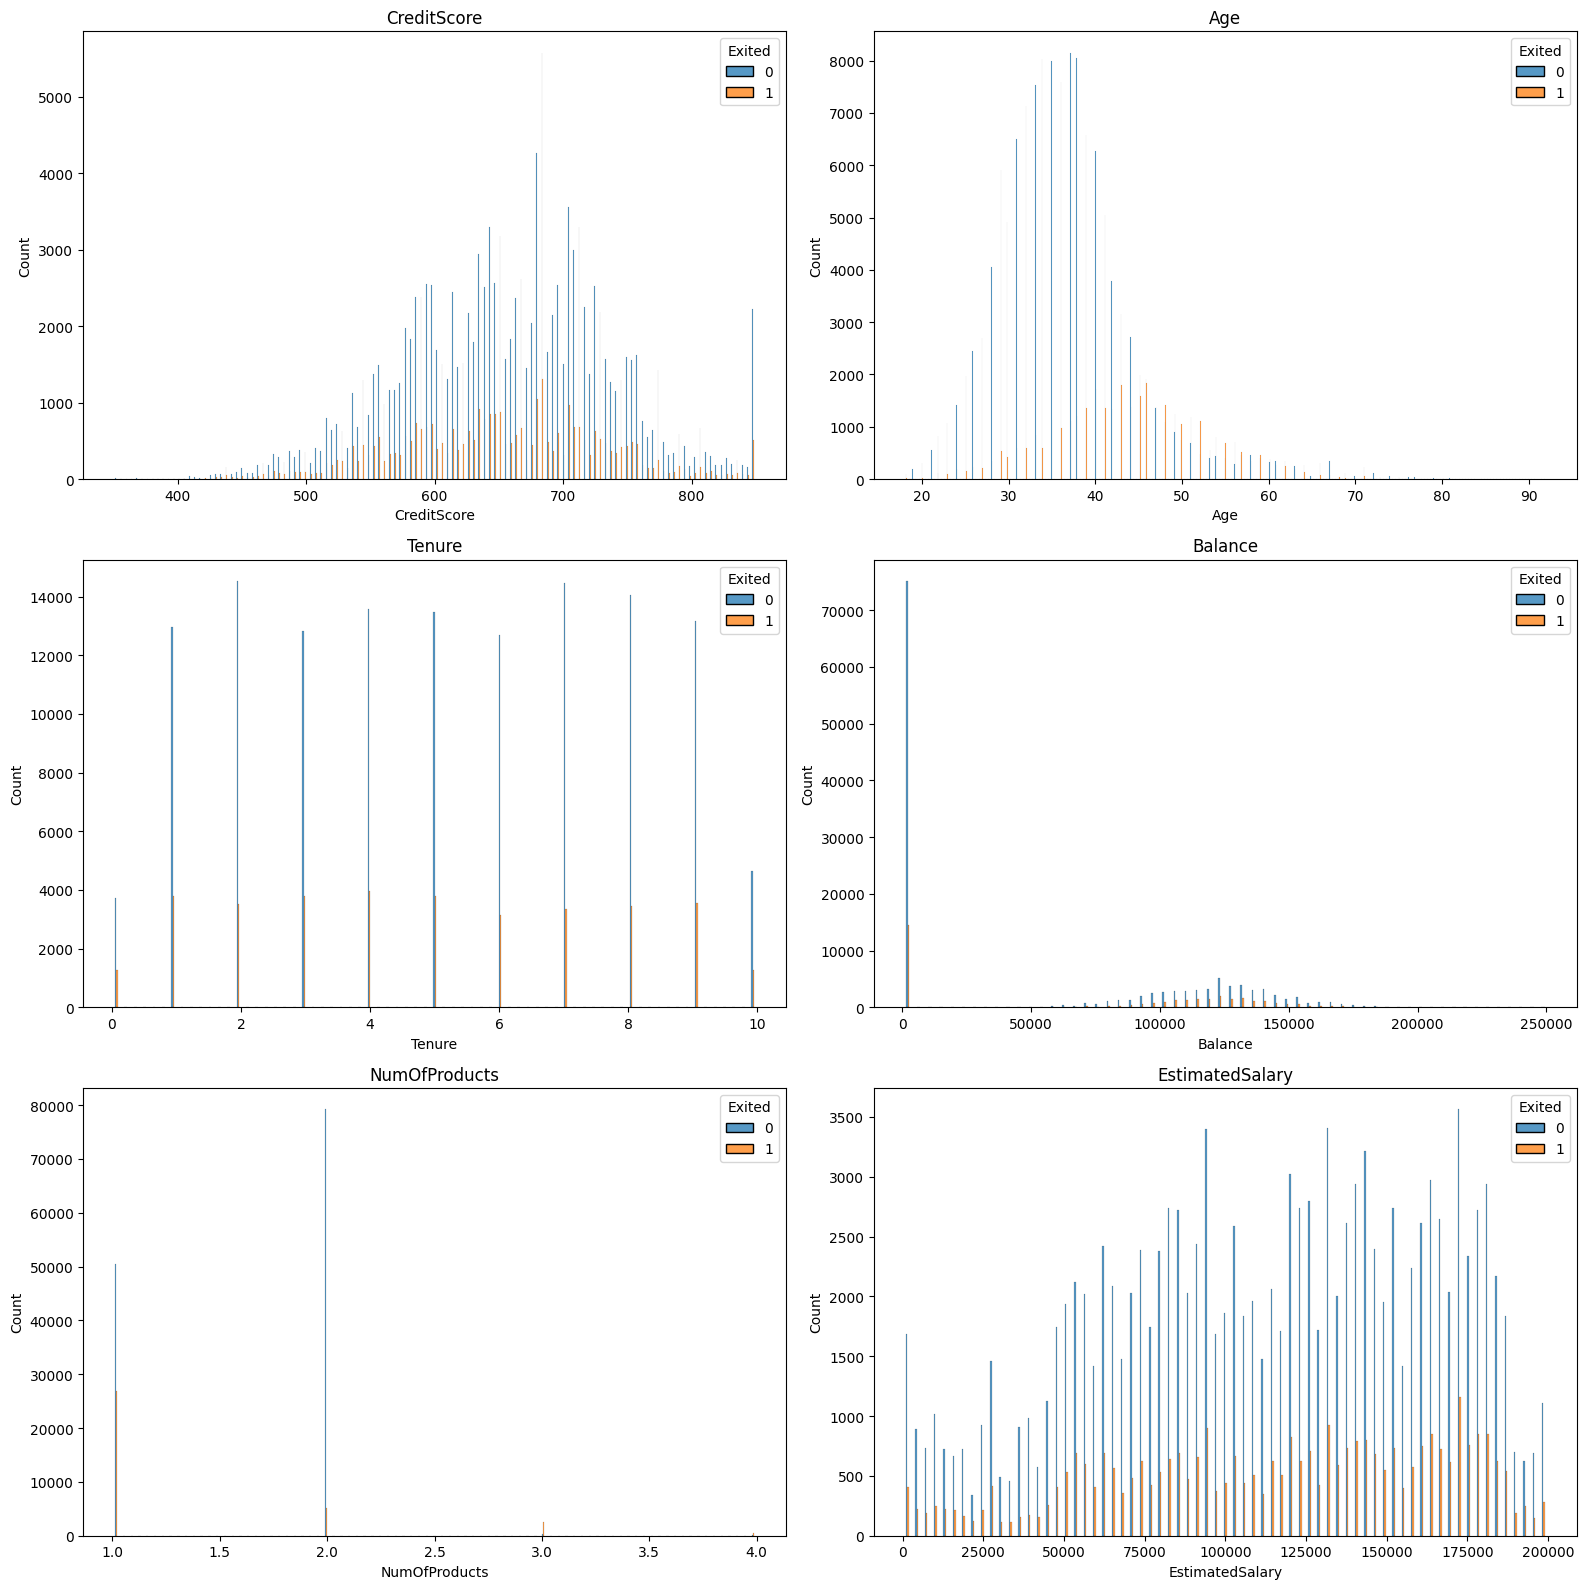

In [ ]:
# 수치형 변수 분포 확인 : https://zephyrus1111.tistory.com/260 참조

category_col_name = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, ax = plt.subplots(3,2)
fig.set_size_inches((16,16))

for i in range(6):
  row = i//2
  col = i%2
  cur_ax = ax[row, col]
  sns.histplot(data=sub, x=category_col_name[i],
               hue='Exited', multiple="dodge", shrink=.3, ax=cur_ax)
  cur_ax.set_title(category_col_name[i])

plt.tight_layout()

In [ ]:
# 상관계수 확인

sub_corr = sub.corr()
sub_corr.style.background_gradient()
# sns.heatmap(sub_corr, vmax=1, vmin=1, annot=True, cmap="coolwarm")

<ipython-input-14-d63de2f2b0bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_corr = sub.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.007364,0.002696,-0.001252,-0.008348,0.004380,-0.005469,-0.002934,0.002891,-0.009947
CreditScore,0.007364,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,0.002696,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,-0.001252,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,-0.008348,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.004380,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.005469,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,-0.002934,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,0.002891,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.009947,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


### 2) 피처 엔지니어링

##### 2-1) Scaling

* https://tnqkrdmssjan.tistory.com/84 참조
* Robust Scaling 선택 : 이상치에 덜 민감하기 때문



In [ ]:
# 학습 데이터에서 수치형 변수만 선택
numerical_sub = sub.dtypes[sub.dtypes != "object"].index.tolist()
numerical_sub.remove("CustomerId")
num_sub = sub[numerical_sub]
num_sub.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
# 라이브러리 로딩
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()

In [ ]:
# Robust Scaling
sk_sub = rbscaler.fit_transform(num_sub)
sk_sub_df = pd.DataFrame(sk_sub, columns=num_sub.columns)
sk_sub_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.079646,-0.4,-0.50,0.000000,0.0,0.0,0.0,0.788698,0.0
1,-0.283186,-0.4,-1.00,0.000000,0.0,0.0,1.0,-0.850085,0.0
2,0.168142,0.3,1.25,0.000000,0.0,0.0,0.0,0.831134,0.0
3,-0.690265,-0.3,-0.75,1.241313,-1.0,0.0,1.0,-0.414670,0.0
4,0.504425,-0.4,0.00,0.000000,0.0,0.0,1.0,-1.277766,0.0


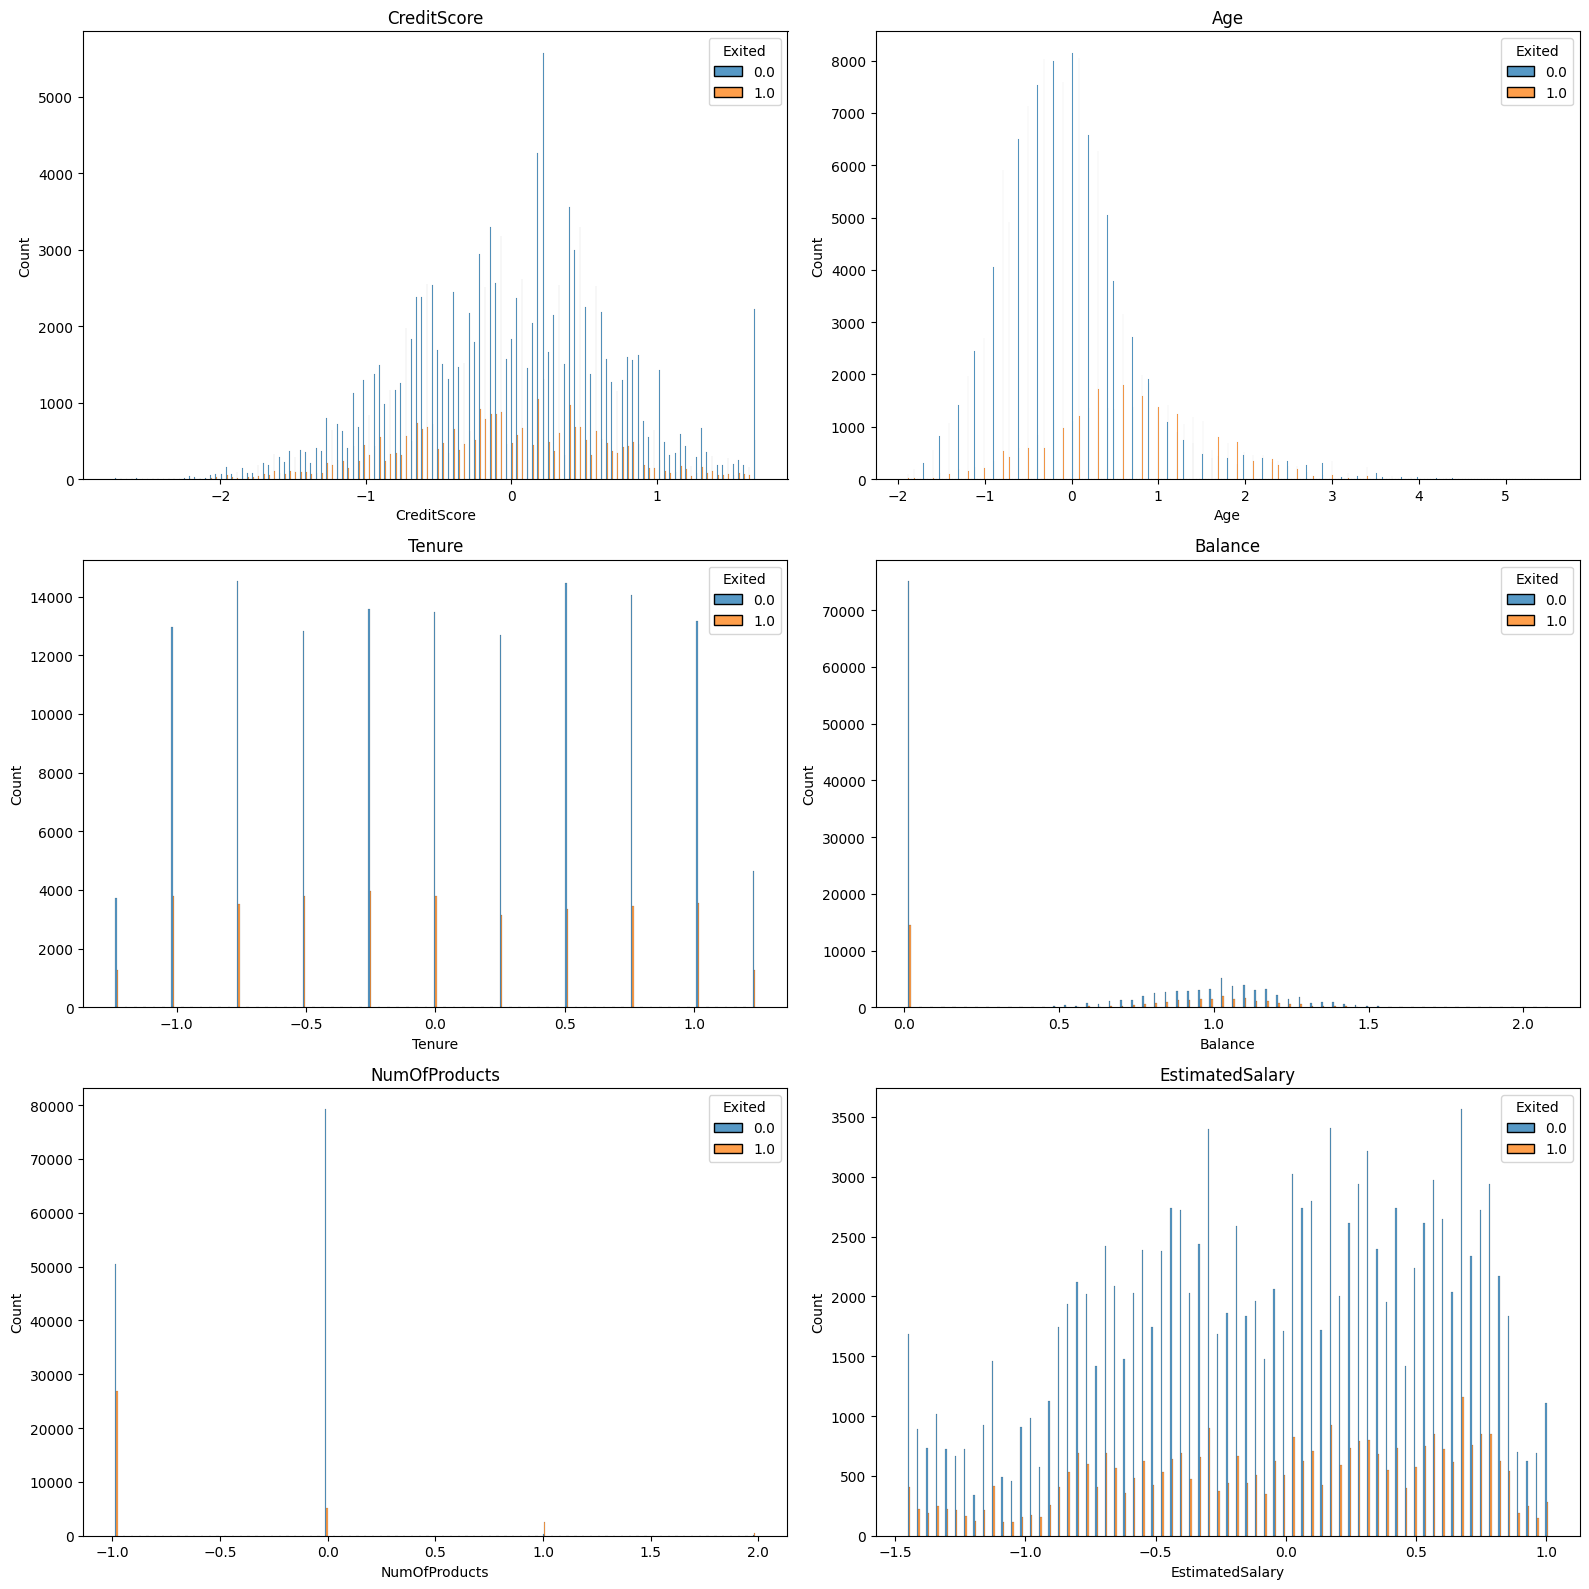

In [ ]:
# 결과 확인

category_col_name = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, ax = plt.subplots(3,2)
fig.set_size_inches((16,16))

for i in range(6):
  row = i//2
  col = i%2
  cur_ax = ax[row, col]
  sns.histplot(data=sk_sub_df, x=category_col_name[i],
               hue='Exited', multiple="dodge", shrink=.3, ax=cur_ax)
  cur_ax.set_title(category_col_name[i])

plt.tight_layout()

##### 2-2) 로그 변환 : Robust Scaling과 겹치므로 취소

In [ ]:
"""

# 치우친 분포의 칼럼 저장
skew_columns = ['CreditScore', 'Age', 'EstimatedSalary']

# 로그 변환 수행
for i in skew_columns:
  sk_sub_df[i] = np.log1p(sk_sub_df[i].astype(float))

"""

"\n\n# 치우친 분포의 칼럼 저장\nskew_columns = ['CreditScore', 'Age', 'EstimatedSalary']\n\n# 로그 변환 수행\nfor i in skew_columns:\n  sk_sub_df[i] = np.log1p(sk_sub_df[i].astype(float))\n\n"

In [ ]:
"""

# 결과 확인

fig, ax = plt.subplots(2,2)
fig.set_size_inches((10,10))

for i in range(3):
  row = i//2
  col = i%2
  cur_ax = ax[row, col]
  sns.histplot(data=sk_sub_df, x=skew_columns[i],
              hue='Exited', multiple="dodge", shrink=.3, ax=cur_ax)
  cur_ax.set_title(category_col_name[i])

plt.tight_layout()

"""

'\n\n# 결과 확인\n\nfig, ax = plt.subplots(2,2)\nfig.set_size_inches((10,10))\n\nfor i in range(3):\n  row = i//2\n  col = i%2\n  cur_ax = ax[row, col]\n  sns.histplot(data=sk_sub_df, x=skew_columns[i],\n              hue=\'Exited\', multiple="dodge", shrink=.3, ax=cur_ax)\n  cur_ax.set_title(category_col_name[i])\n\nplt.tight_layout()\n\n'

##### 2-3) 수치형 변수 → 범주형 변수 변환 및 인코딩

* https://velog.io/@jjw9599/featureengineering 참조
* One-Hot Encoding 사용


* CreditScore, Age, EstimatedSalary : 값 분포에 따른 4분할 (Quantile 확인 → 올림 처리)
* Balance
  * 0을 제외한 나머지 항목에 대한 값 분포 기준 4분할 (Quantile 확인 → 올림 처리)
  * 0은 별도 범주로 분류
* Tenure : 비교적으로 구간별 분포가 고른 편 → Min~Max 구간에 대한 산술적 4분할
* NumOfProducts : 이미 4개 구간으로 나뉘어 있음 (1, 2, 3, 4)



In [ ]:
# 1) CreditScore 4분할을 위한 Quantile 확인
CS_Q1 = sub['CreditScore'].quantile(0.25)
CS_Q2 = sub['CreditScore'].quantile(0.5)
CS_Q3 = sub['CreditScore'].quantile(0.75)
CS_Q4 = sub['CreditScore'].max()
print(CS_Q1, CS_Q2, CS_Q3, CS_Q4)

# 2) 1번의 각 항목에 대한 십의 자리 반올림(Round : Ro)
CS_Q1_Ro = np.round(CS_Q1, -1)
CS_Q2_Ro = np.round(CS_Q2, -1)
CS_Q3_Ro = np.round(CS_Q3, -1)
CS_Q4_Ro = np.round(CS_Q4, -1)
print(CS_Q1_Ro, CS_Q2_Ro, CS_Q3_Ro, CS_Q4_Ro)

# 3) CreditScore 4분할 칼럼(범주형 변수) 생성
sub['CS_Quantile'] = 0
sub.loc[sub['CreditScore'] <= CS_Q1_Ro, 'CS_Quantile'] = 'A'
sub.loc[(sub['CreditScore'] > CS_Q1_Ro) & (sub['CreditScore'] <= CS_Q2_Ro), 'CS_Quantile'] = 'B'
sub.loc[(sub['CreditScore'] > CS_Q2_Ro) & (sub['CreditScore'] <= CS_Q3_Ro), 'CS_Quantile'] = 'C'
sub.loc[sub['CreditScore'] > CS_Q3_Ro, 'CS_Quantile'] = 'D'
print(sub.CS_Quantile)

597.0 659.0 710.0 850
600.0 660.0 710.0 850
id
0         C
1         B
2         C
3         A
4         D
         ..
165029    C
165030    D
165031    A
165032    A
165033    D
Name: CS_Quantile, Length: 165034, dtype: object


In [ ]:
# 1) Age 4분할을 위한 Quantile 확인
Age_Q1 = sub['Age'].quantile(0.25)
Age_Q2 = sub['Age'].quantile(0.5)
Age_Q3 = sub['Age'].quantile(0.75)
Age_Q4 = sub['Age'].max()
print(Age_Q1, Age_Q2, Age_Q3, Age_Q4)

# 2) 1번의 각 항목에 대한 십의 자리 반올림(Round : Ro)
Age_Q1_Ro = np.round(Age_Q1, -1)
Age_Q2_Ro = np.round(Age_Q2, -1)
Age_Q3_Ro = np.round(Age_Q3, -1) + 10    # Age_Q2_Ro, Age_Q3_Ro 값이 동일함 : 40대, 50대 분리를 위해 +10을 더함
Age_Q4_Ro = np.round(Age_Q4, -1)
print(Age_Q1_Ro, Age_Q2_Ro, Age_Q3_Ro, Age_Q4_Ro)

# 3) Age 4분할 칼럼(범주형 변수) 생성
sub['Age_Quantile'] = 0
sub.loc[sub['Age'] <= Age_Q1_Ro, 'Age_Quantile'] = 'A'
sub.loc[(sub['Age'] > Age_Q1_Ro) & (sub['Age'] <= Age_Q2_Ro), 'Age_Quantile'] = 'B'
sub.loc[(sub['Age'] > Age_Q2_Ro) & (sub['Age'] <= Age_Q3_Ro), 'Age_Quantile'] = 'C'
sub.loc[sub['Age'] > Age_Q3_Ro, 'Age_Quantile'] = 'D'
print(sub.Age_Quantile)

32.0 37.0 42.0 92.0
30.0 40.0 50.0 90.0
id
0         B
1         B
2         B
3         B
4         B
         ..
165029    B
165030    B
165031    B
165032    A
165033    B
Name: Age_Quantile, Length: 165034, dtype: object


In [ ]:
# 1) EstimatedSalary(=ES) 4분할을 위한 Quantile 확인
ES_Q1 = sub['EstimatedSalary'].quantile(0.25)
ES_Q2 = sub['EstimatedSalary'].quantile(0.5)
ES_Q3 = sub['EstimatedSalary'].quantile(0.75)
ES_Q4 = sub['EstimatedSalary'].max()
print(ES_Q1, ES_Q2, ES_Q3, ES_Q4)

# 2) 1번의 각 항목에 대한 천의 자리 반올림(Round : Ro)
ES_Q1_Ro = np.round(ES_Q1, -3)
ES_Q2_Ro = np.round(ES_Q2, -3)
ES_Q3_Ro = np.round(ES_Q3, -3)
ES_Q4_Ro = np.round(ES_Q4, -3)
print(ES_Q1_Ro, ES_Q2_Ro, ES_Q3_Ro, ES_Q4_Ro)

# 3) CreditScore 4분할 칼럼(범주형 변수) 생성
sub['ES_Quantile'] = 0
sub.loc[sub['EstimatedSalary'] <= ES_Q1_Ro, 'ES_Quantile'] = 'A'
sub.loc[(sub['EstimatedSalary'] > ES_Q1_Ro) & (sub['EstimatedSalary'] <= ES_Q2_Ro), 'ES_Quantile'] = 'B'
sub.loc[(sub['EstimatedSalary'] > ES_Q2_Ro) & (sub['EstimatedSalary'] <= ES_Q3_Ro), 'ES_Quantile'] = 'C'
sub.loc[sub['EstimatedSalary'] > ES_Q3_Ro, 'ES_Quantile'] = 'D'
print(sub.ES_Quantile)

74637.57 117948.0 155152.4675 199992.48
75000.0 118000.0 155000.0 200000.0
id
0         D
1         A
2         D
3         B
4         A
         ..
165029    C
165030    C
165031    C
165032    A
165033    A
Name: ES_Quantile, Length: 165034, dtype: object


In [ ]:
# 1) Balance(=Bal) 칼럼 : 범주형 변수 변환을 위해 0인 계좌를 제외한 나머지 계좌의 Quantile 확인

bal_posi = []
bal_zero = []
sub_len = len(sub.Balance)

for i in range(sub_len):
  if sub.Balance[i] > 0: # bal_zero를 변수형 범주로 바꾸는게 최선일지도...?
    bal_posi.append(float(sub.loc[i]['Balance']))
  else:
    bal_zero.append(float(sub.loc[i]['Balance']))

bal_posi_df = pd.DataFrame(bal_posi, columns=['Balance'])


# 2) bal_posi_df 기준 4분할을 위한 Quantile 확인

Bal_Q1 = bal_posi_df['Balance'].quantile(0.25)
Bal_Q2 = bal_posi_df['Balance'].quantile(0.5)
Bal_Q3 = bal_posi_df['Balance'].quantile(0.75)
Bal_Q4 = bal_posi_df['Balance'].max()
print(Bal_Q1, Bal_Q2, Bal_Q3, Bal_Q4)


# 3) 2번의 각 항목에 대한 만의 자리 반올림(Round : Ro)

Bal_Q1_Ro = np.round(Bal_Q1, -4)
Bal_Q2_Ro = np.round(Bal_Q2, -4)
Bal_Q3_Ro = np.round(Bal_Q3, -4)
Bal_Q4_Ro = np.round(Bal_Q4, -4)
print(Bal_Q1_Ro, Bal_Q2_Ro, Bal_Q3_Ro, Bal_Q4_Ro)


# 4) CreditScore 4분할 칼럼(범주형 변수) 생성

sub['Bal_Quantile'] = 0
sub.loc[sub['Balance'] == 0, 'Bal_Quantile'] = 'A'
sub.loc[(sub['Balance'] > 0) & (sub['Balance'] <= Bal_Q1_Ro), 'Bal_Quantile'] = 'B'
sub.loc[(sub['Balance'] > Bal_Q1_Ro) & (sub['Balance'] <= Bal_Q2_Ro), 'Bal_Quantile'] = 'C'
sub.loc[(sub['Balance'] > Bal_Q2_Ro) & (sub['Balance'] <= Bal_Q3_Ro), 'Bal_Quantile'] = 'D'
sub.loc[sub['Balance'] > Bal_Q3_Ro, 'Bal_Quantile'] = 'E'
print(sub.ES_Quantile)

105224.11 122314.39 137781.65 250898.09
110000.0 120000.0 140000.0 250000.0
id
0         D
1         A
2         D
3         B
4         A
         ..
165029    C
165030    C
165031    C
165032    A
165033    A
Name: ES_Quantile, Length: 165034, dtype: object


In [ ]:
# 1) Tenure(=Te) 4분할을 위한 기준 숫자 확인
no_1 = sub['Tenure'].max() - sub['Tenure'].min()
no_2 = no_1 / 4

# 2) 1번의 각 항목에 대한 일의 자리 반올림(Round : Ro)
Te_DV_1 = round((sub['Tenure'].min() + no_2), 0)
Te_DV_2 = round(Te_DV_1 + no_2, 0)
Te_DV_3 = round(Te_DV_2 + no_2, 0)
Te_DV_4 = round(Te_DV_3 + no_2, 0)
print(Te_DV_1, Te_DV_2, Te_DV_3, Te_DV_4)

# 3) Tenure 4분할 칼럼(범주형 변수) 생성
sub['Te_DV'] = 0
sub.loc[sub['Tenure'] <= Te_DV_1, 'Te_DV'] = 'A'
sub.loc[(sub['Tenure'] > Te_DV_1) & (sub['Tenure'] <= Te_DV_2), 'Te_DV'] = 'B'
sub.loc[(sub['Tenure'] > Te_DV_2) & (sub['Tenure'] <= Te_DV_3), 'Te_DV'] = 'C'
sub.loc[sub['Tenure'] > Te_DV_3, 'Te_DV'] = 'D'
print(sub.Te_DV)

2.0 4.0 6.0 8.0
id
0         B
1         A
2         D
3         A
4         C
         ..
165029    A
165030    B
165031    C
165032    D
165033    A
Name: Te_DV, Length: 165034, dtype: object


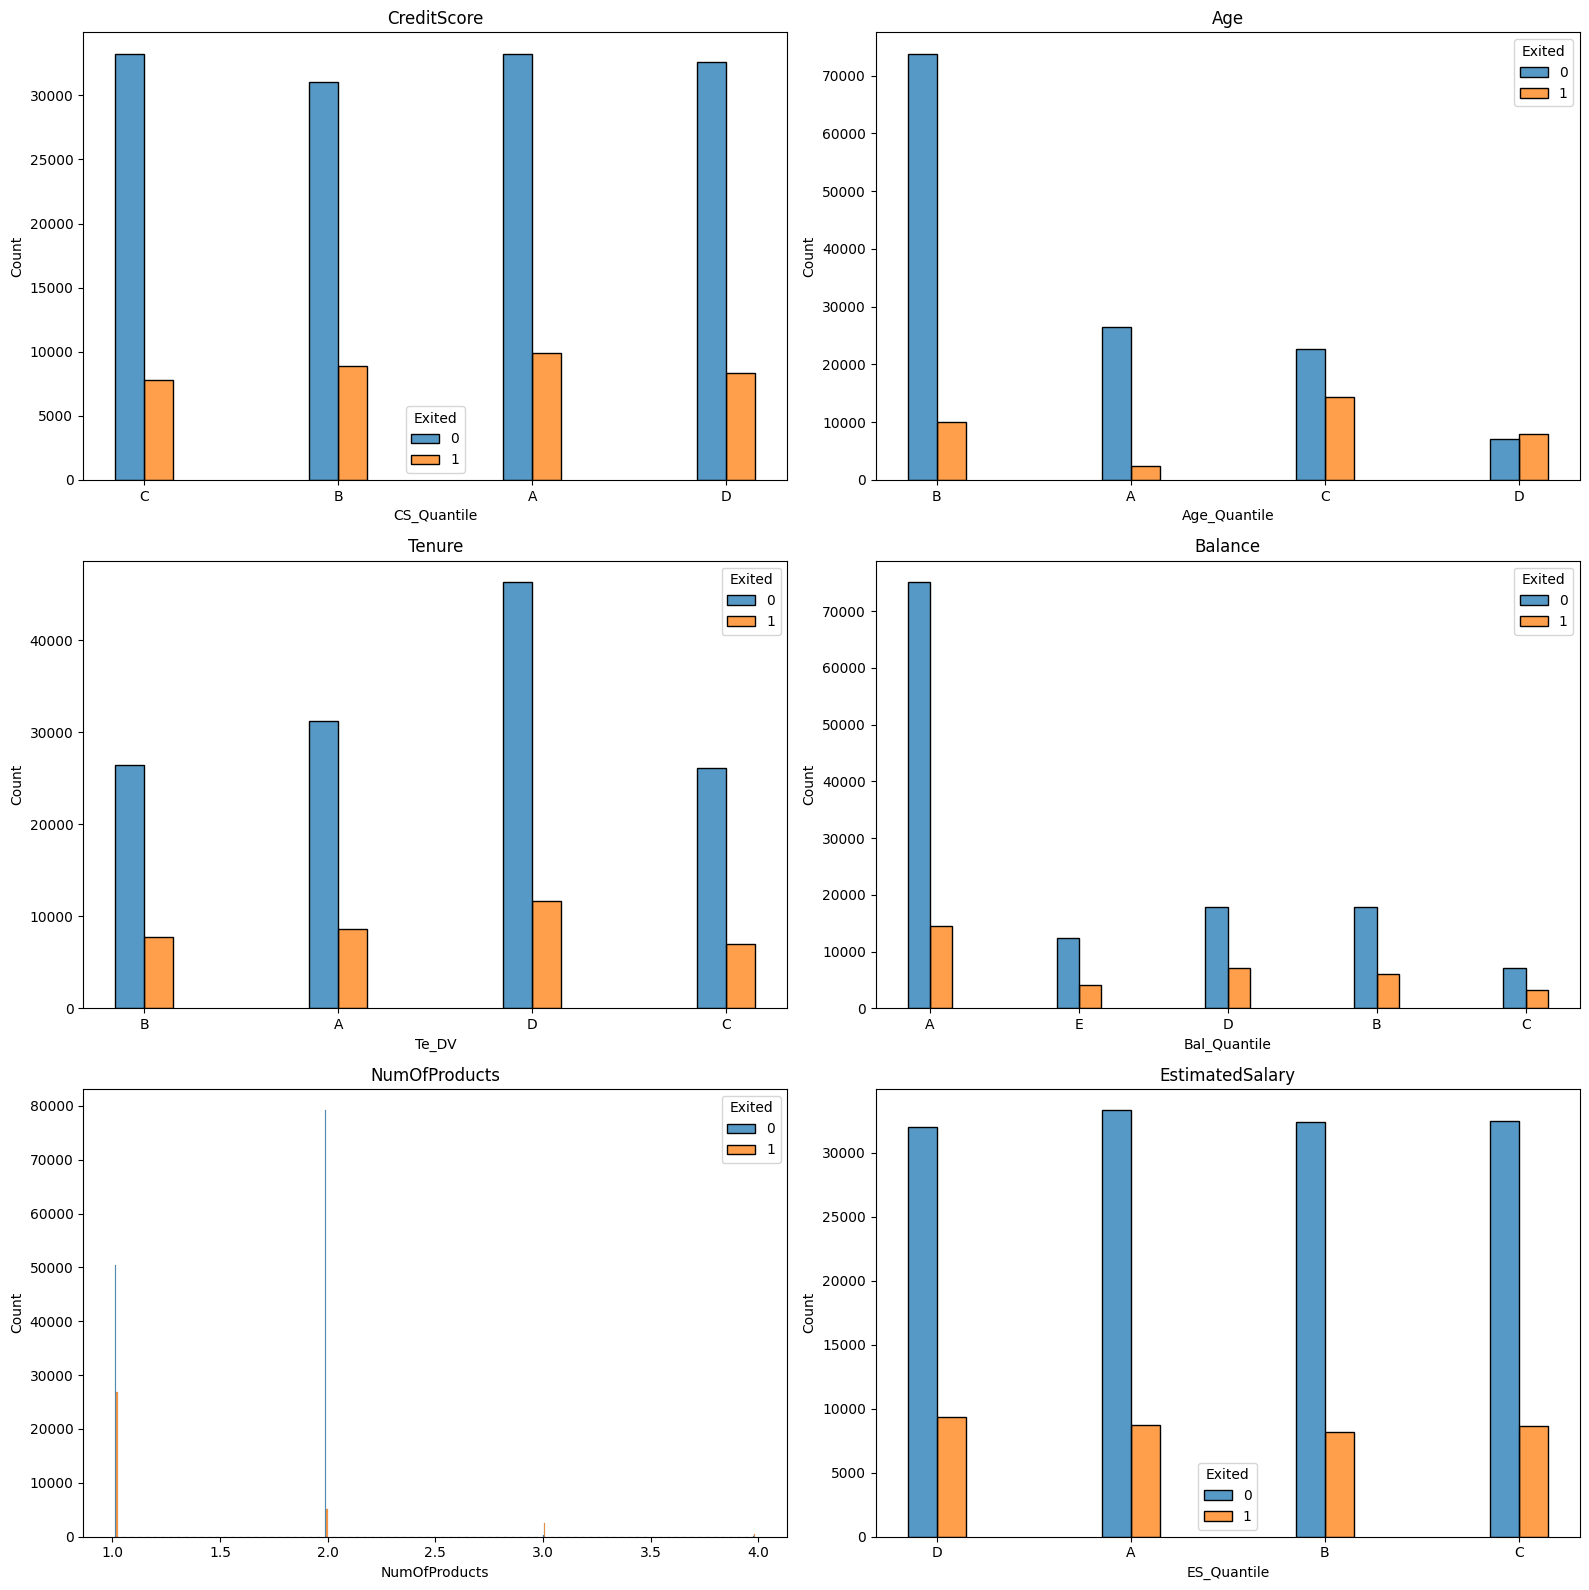

In [ ]:
# 수치형 변수 → 범주형 변수 변환 결과 확인

category_col_names = ['CS_Quantile', 'Age_Quantile', 'Te_DV', 'Bal_Quantile', 'NumOfProducts', 'ES_Quantile']

fig, ax = plt.subplots(3,2)
fig.set_size_inches((16,16))

for i in range(6):
  row = i//2
  col = i%2
  cur_ax = ax[row, col]
  sns.histplot(data=sub, x=category_col_names[i],
               hue='Exited', multiple="dodge", shrink=.3, ax=cur_ax)
  cur_ax.set_title(category_col_name[i])

plt.tight_layout()

In [ ]:
# NumOfProducts, IsActiveMember 칼럼의 Encoding 처리
# https://stackoverflow.com/questions/57012428/encoding-text-columns-in-pandas-data-frame 참조

sub['NP_en'] = sub['NumOfProducts'].astype(str).str.encode('utf-8')
sub['AM_en'] = sub['IsActiveMember'].astype(str).str.encode('utf-8')

In [ ]:
# 범주형 변수의 One-Hot Encoding

prefix = ('CS_Quantile', 'Age_Quantile', 'Te_DV', 'Bal_Quantile', 'NP_en', 'ES_Quantile',
          'Geography', 'Gender', 'HasCrCard', 'AM_en')

sub_OHE = pd.get_dummies(sub, prefix=prefix)
sub_OHE.head(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Gender_A,Gender_B,Gender_C,Gender_D,HasCrCard_b'1',HasCrCard_b'2',HasCrCard_b'3',HasCrCard_b'4',AM_en_b'0.0',AM_en_b'1.0'
id,,,,,,,,,,,,,,,,,,,,,
0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,...,0,1,0,0,0,1,0,0,1,0
1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,...,1,0,0,0,0,1,0,0,0,1
2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,...,0,0,0,1,0,1,0,0,1,0
3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,...,1,0,0,0,1,0,0,0,0,1
4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,...,0,0,1,0,0,1,0,0,0,1
5,15771669,588,36.0,4,131778.58,1,1.0,0.0,136024.31,1,...,0,1,0,0,1,0,0,0,1,0
6,15692819,593,30.0,8,144772.69,1,1.0,0.0,29792.11,0,...,0,0,0,1,1,0,0,0,1,0
7,15669611,678,37.0,1,138476.41,1,1.0,0.0,106851.60,0,...,1,0,0,0,1,0,0,0,1,0
8,15691707,676,43.0,4,0.00,2,1.0,0.0,142917.13,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# 학습용 데이터에서 Exited 칼럼을 삭제하기
sub_OHE = sub_OHE.drop('Exited', axis=1)
print(sub_OHE.columns)

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'CS_Quantile_Abazu',
       ...
       'Gender_A', 'Gender_B', 'Gender_C', 'Gender_D', 'HasCrCard_b'1'',
       'HasCrCard_b'2'', 'HasCrCard_b'3'', 'HasCrCard_b'4'', 'AM_en_b'0.0'',
       'AM_en_b'1.0''],
      dtype='object', length=2838)


##### 2-4) 학습용 데이터의 훈련 세트, 데이터 세트 분할

In [ ]:
# 학습용 데이터의 정답값('Exited' 칼럼)을 sub_answer로 옮기기
sub_answer = pd.DataFrame()
sub_answer[['CustomerId', 'Exited']] = sub[['CustomerId', 'Exited']]
sub_answer.head(10)

,CustomerId,Exited
id,,
0,15674932,0
1,15749177,0
2,15694510,0
3,15741417,0
4,15766172,0
5,15771669,1
6,15692819,0
7,15669611,0
8,15691707,0


In [ ]:
# 데이터셋 분할 : 훈련 세트, 테스트 세트

feature_names = sub.select_dtypes(include="number").columns     # 학습, 예측에 사용할 칼럼에 대한 이름 지정
label_name = "Exited"                                           # 예측해야 할 칼럼의 이름 담기
X = sub[feature_names]                                          # 독립변수 나누기
y = sub[label_name]                                             # 종속변수 나누기
split_count = int(sub.shape[0] * 0.8)                           # train, test를 나누기 위한 기준 설정 (데이터의 80%)

X_train = X.iloc[:split_count]                                  # 학습용 데이터 분할 : 훈련/테스트
X_test = X.iloc[split_count:]

X_train = X_train.drop('Exited', axis=1)                        # 학습용 데이터에서 Exited 칼럼을 삭제하기
X_test = X_test.drop('Exited', axis=1)

y_train = y.iloc[:split_count]                                  # 학습용 데이터의 정답 데이터 분할
y_test = y.iloc[split_count:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132027, 9) (33007, 9) (132027,) (33007,)


### 3) 모델 훈련 및 하이퍼파라미터 튜닝 → 모델 성능 평가

* 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
* (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

* 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다.
* 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.



##### 3-1) Logistic Regression

##### 3-2) Decision Tree

In [ ]:
# 수치형 데이터만 포함한 Train/Test 데이터 생성

feature_num_names_DT = X_train.select_dtypes(include="number").columns

X_train_DT = X_train[feature_num_names_DT]
X_test_DT = X_test[feature_num_names_DT]

y_train_DT = y_train
y_test_DT = y_test

print(X_train_DT.shape, X_test_DT.shape, y_train_DT.shape, y_test_DT.shape)

(132027, 9) (33007, 9) (132027,) (33007,)


In [ ]:
# 데이터를 머신러닝 모델로 학습 진행 (Fitting)

from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

model_DT = DecisionTreeClassifier(criterion="gini",
                               max_depth=15,              # 트리의 깊이
                               max_features=0.9,          # 전체 피처의 90% 만 사용
                               random_state=42)

model_DT.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(max_depth=15, max_features=0.9, random_state=42)

In [ ]:
# 데이터를 머신러닝 모델로 예측 진행 (Prediction)

y_predict_DT = model_DT.predict(X_test_DT)
y_predict_DT[:5]

array([0, 0, 0, 1, 0])

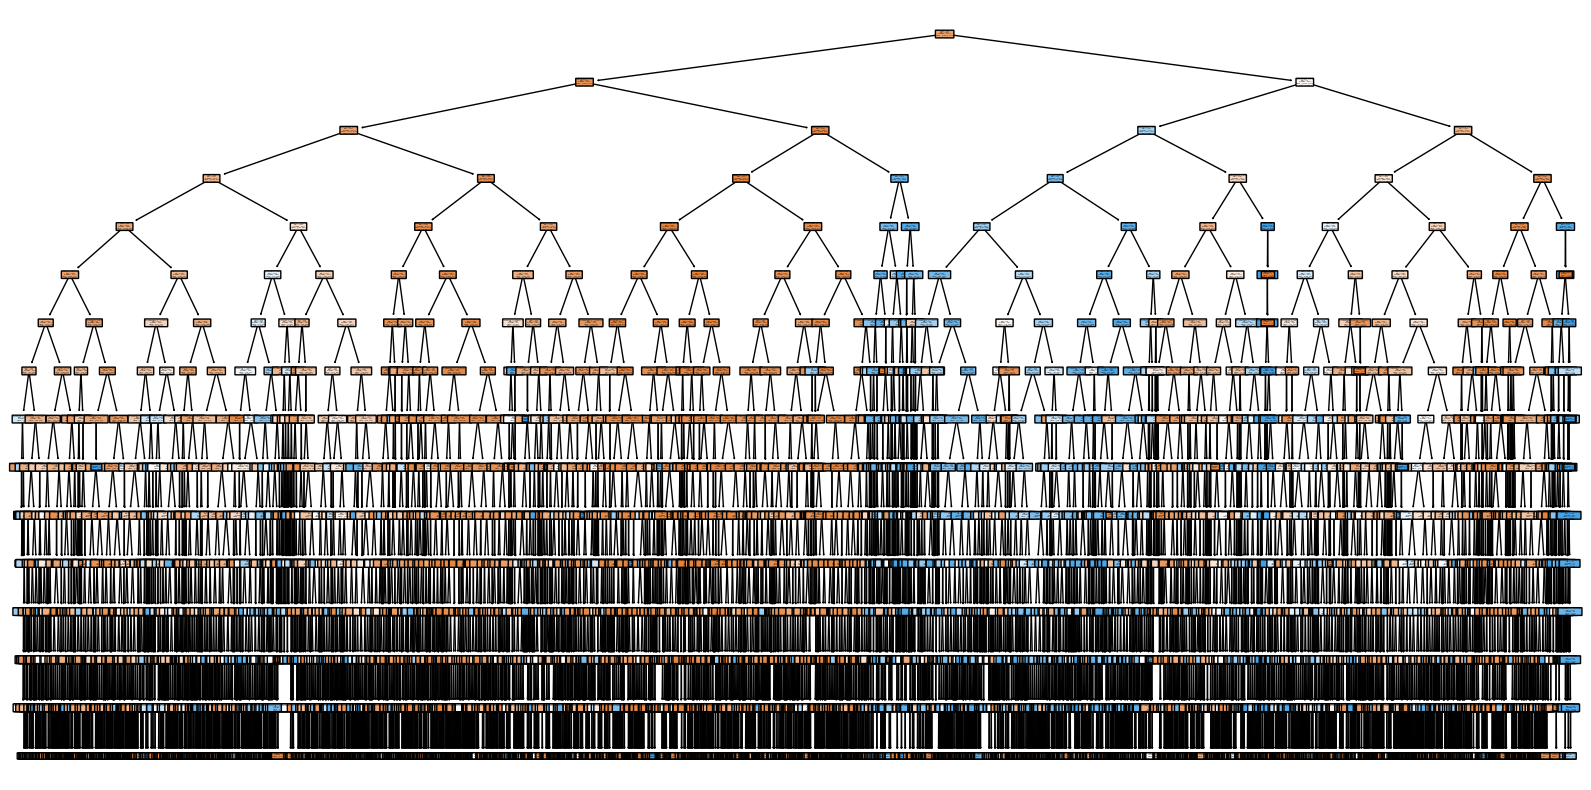

In [ ]:
# Tree 시각화

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model_DT, feature_names=X_train_DT.columns, class_names=["No Exited", "Exited"], filled=True, rounded=True)
plt.show()

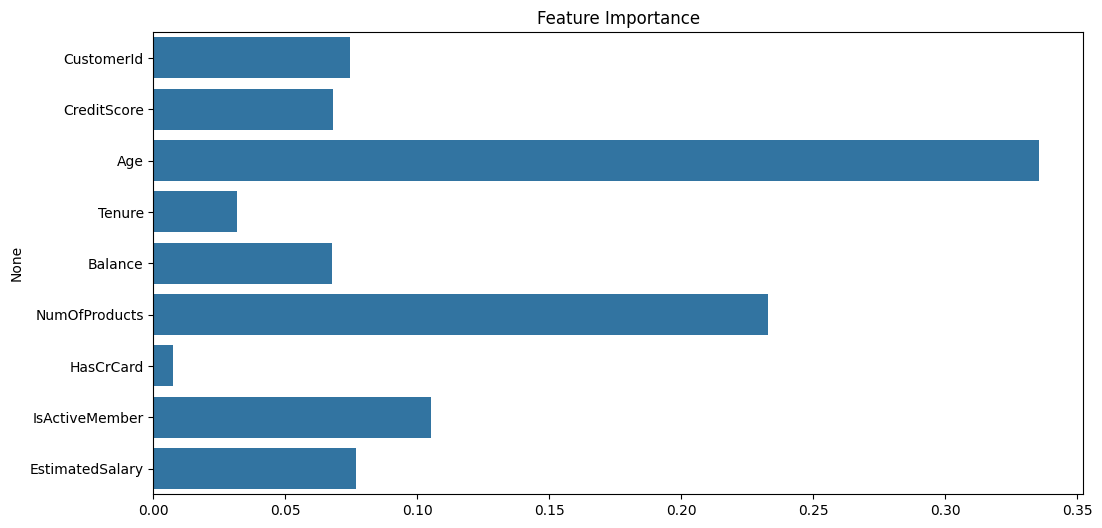

In [ ]:
# 피처 중요도 시각화

feature_importances_DT = model_DT.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_DT, y=feature_num_names_DT)
plt.title('Feature Importance')
plt.show()

In [ ]:
# 정확도(Accuracy) 확인

from sklearn.metrics import accuracy_score

accuracy_DT = accuracy_score(y_test_DT, y_predict_DT)
print(f"Accuracy of Decision Tree Model: {accuracy_DT:.4f}")

Accuracy of Decision Tree Model: 0.8340


##### 3-3) Random Forest

##### 3-4) SVG (Support Vector Machine)

##### 3-5) Gradient Boosting

##### 3-6) XGBoost

##### 3-7) LightGBM

참조 사이트 목록

* [[Python] 머신러닝 완벽가이드 - 04. 분류[LightGBM]](https://romg2.github.io/mlguide/04_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-04.-%EB%B6%84%EB%A5%98-LightGBM/)
* [Light GBM 설명](https://potato-potahto.tistory.com/entry/Light-GBM-%EC%84%A4%EB%AA%85%ED%8A%B9%EC%A7%95%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%EC%84%A4%EC%B9%98-%EC%82%AC%EC%9A%A9%EB%B0%A9%EB%B2%95)
* [Python-package Introduction : LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html)
* [LightGBM vs CatBoost vs XGBoost](https://dodonam.tistory.com/431)





In [ ]:
# LightGBM : 하이퍼파라미터 튜닝 기능 제공 → 수치형, 범주형 모두 포함한 Train/Test 데이터 생성

X_train_lgbm = X_train
X_test_lgbm = X_test

y_train_lgbm = y_train
y_test_lgbm = y_test

print(X_train_lgbm.shape, X_test_lgbm.shape, y_train_lgbm.shape, y_test_lgbm.shape)

(132027, 9) (33007, 9) (132027,) (33007,)


In [ ]:
# 학습

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=4000)
lgbm_wrapper.fit(X_train_lgbm, y_train_lgbm)

[LightGBM] [Info] Number of positive: 27911, number of negative: 104116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211404 -> initscore=-1.316485
[LightGBM] [Info] Start training from score -1.316485


LGBMClassifier(n_estimators=4000)

In [ ]:
# 예측

predict_lgbm = lgbm_wrapper.predict(X_test_lgbm)
pred_proba_lgbm = lgbm_wrapper.predict_proba(X_test_lgbm)[:,1]

In [ ]:
# 성능 평가 함수

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_eval_score(y_test_lgbm, pred=None, pred_proba_po=None):
  accuracy = accuracy_score(y_test_lgbm, pred)
  precision = precision_score(y_test_lgbm, pred)
  recall = recall_score(y_test_lgbm, pred)
  f1 = f1_score(y_test_lgbm, pred)
  auc = roc_auc_score(y_test_lgbm, pred_proba_po)

  print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [ ]:
# 평가

get_eval_score(y_test_lgbm, predict_lgbm, pred_proba_lgbm)

정확도: 0.8486, 정밀도: 0.6971, 재현율: 0.5081, F1: 0.5878, AUC: 0.8598


##### 3-8) CatBoost

참조 사이트 목록

* [[파이썬] catboost 텐서플로우와의 통합](https://colinch4.github.io/2023-09-07/11-15-04-207132/#:~:text=%EB%8B%A4%EC%9D%8C%EC%9D%80%20CatBoost%20%EB%AA%A8%EB%8D%B8%EC%9D%84%20%ED%95%99%EC%8A%B5%ED%95%98%EA%B3%A0%20%EC%A0%80%EC%9E%A5%ED%95%98%EB%8A%94%20%EC%BD%94%EB%93%9C%20%EC%98%88%EC%8B%9C%EC%9E%85%EB%8B%88%EB%8B%A4.%20import,%3D%20cb.CatBoostClassifier%28%29%20model.fit%28train_data%29%20%23%20CatBoost%20%EB%AA%A8%EB%8D%B8%20%EC%A0%80%EC%9E%A5%20model.save_model%28%27catboost_model.cbm%27%29)
* [LightGBM vs CatBoost vs XGBoost](https://dodonam.tistory.com/431)


In [ ]:
# CatBoost : 하이퍼파라미터 튜닝 기능 제공 → 수치형, 범주형 모두 포함한 Train/Test 데이터 생성

X_train_cat = X_train
X_test_cat = X_test

y_train_cat = y_train
y_test_cat = y_test

print(X_train_cat.shape, X_test_cat.shape, y_train_cat.shape, y_test_cat.shape)

(132027, 9) (33007, 9) (132027,) (33007,)


In [ ]:
# CatBoost 라이브러리 로딩 및 데이터셋 생성

!pip install catboost
import catboost as cat

cat_train = cat.Pool(X_train_cat, y_train_cat)
cat_test = cat.Pool(X_test_cat, y_test_cat)

In [ ]:
# 학습
model_cat = cat.CatBoostClassifier()
model_cat.fit(cat_train)

Learning rate set to 0.082881
0:	learn: 0.6183009	total: 91.2ms	remaining: 1m 31s
1:	learn: 0.5593518	total: 119ms	remaining: 59.4s
2:	learn: 0.5170793	total: 146ms	remaining: 48.6s
3:	learn: 0.4815627	total: 174ms	remaining: 43.4s
4:	learn: 0.4546605	total: 205ms	remaining: 40.7s
5:	learn: 0.4334412	total: 232ms	remaining: 38.4s
6:	learn: 0.4167582	total: 260ms	remaining: 36.8s
7:	learn: 0.4023152	total: 289ms	remaining: 35.8s
8:	learn: 0.3916128	total: 318ms	remaining: 35s
9:	learn: 0.3820621	total: 348ms	remaining: 34.5s
10:	learn: 0.3747966	total: 376ms	remaining: 33.8s
11:	learn: 0.3687136	total: 408ms	remaining: 33.6s
12:	learn: 0.3644672	total: 438ms	remaining: 33.3s
13:	learn: 0.3605455	total: 468ms	remaining: 33s
14:	learn: 0.3573160	total: 502ms	remaining: 33s
15:	learn: 0.3546834	total: 531ms	remaining: 32.7s
16:	learn: 0.3523470	total: 566ms	remaining: 32.7s
17:	learn: 0.3503990	total: 623ms	remaining: 34s
18:	learn: 0.3487699	total: 668ms	remaining: 34.5s
19:	learn: 0.3474

In [ ]:
# 예측

y_predict_cat = model_cat.predict(cat_test)
y_predict_cat_val = [int(round(x)) for x in y_predict_cat]

In [ ]:
# 정확도 확인

from sklearn.metrics import accuracy_score

acc_cat = accuracy_score(y_test_cat, y_predict_cat_val)
print('CatBoost Accuracy:', acc_cat)

CatBoost Accuracy: 0.856545581240343


### 4) 최종 선택 및 적용

##### 4-1) sample_submission 양식 확인


In [ ]:
# sample_submission 파일 확인

submission = pd.read_csv('./sample_submission.csv')
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


##### 4-2) Decision Tree 모델 기반 예측 결과 확인

1. 모델 예측 결과를 CSV로 저장
2. 1번의 저장 파일을 다운로드 ([네이버 블로그](https://blog.naver.com/PostView.naver?blogId=bya135&logNo=222219703773&parentCategoryNo=&categoryNo=14) 참조)
3. 2번의 파일을 Kaggle에 업로드

In [ ]:
# Test 데이터 형식 변경 : 일부 칼럼 삭제

data_DT = data.drop(columns = ['Surname', 'Geography', 'Gender'])
data_DT.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,
165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
# Decision Tree 기준으로 모델 예측 결과 파일 생성

y_result_DT = model_DT.predict(data_DT)
y_result_DT

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# 제출 파일 양식에 맞춰 데이터 프레임 생성

submission_DT = submission.drop(['Exited'], axis=1)
submission_DT['Exited'] = np.array(y_result_DT)
submission_DT.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [ ]:
# 제출용 파일 저장

submission_DT.to_csv('submission_DT.csv', index=False)

##### 4-3) LightGBM 모델 기반 예측 결과 확인

1. 모델 예측 결과를 CSV로 저장
2. 1번의 저장 파일을 다운로드 ([네이버 블로그](https://blog.naver.com/PostView.naver?blogId=bya135&logNo=222219703773&parentCategoryNo=&categoryNo=14) 참조)
3. 2번의 파일을 Kaggle에 업로드

In [ ]:
# Test 데이터의 일부 칼럼 삭제, One-Hot Encoding

numerical_data = data.dtypes[data.dtypes != "object"].index.tolist()
data_lgbm = data[numerical_data]

data_lgbm.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,
165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
# LightGBM 기준으로 모델 예측 결과 파일 생성

y_result_lgbm = lgbm_wrapper.predict(data_lgbm)
y_result_lgbm

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# 제출 파일 양식에 맞춰 데이터 프레임 생성

submission_lgbm = submission.drop(['Exited'], axis=1)
submission_lgbm['Exited'] = np.array(y_result_lgbm)
submission_lgbm.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [ ]:
# 제출용 파일 저장

submission_lgbm.to_csv('submission_lgbm.csv', index=False)

##### 4-4) CatBoost 모델 기반 예측 결과 확인

1. 모델 예측 결과를 CSV로 저장
2. 1번의 저장 파일을 다운로드 ([네이버 블로그](https://blog.naver.com/PostView.naver?blogId=bya135&logNo=222219703773&parentCategoryNo=&categoryNo=14) 참조)
3. 2번의 파일을 Kaggle에 업로드

In [ ]:
# Test 데이터의 일부 칼럼 삭제, One-Hot Encoding

numerical_data = data.dtypes[data.dtypes != "object"].index.tolist()
data_cat = data[numerical_data]

data_cat.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,
165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
# CatBoost 기준으로 모델 예측 결과 파일 생성

y_result_cat = model_cat.predict(data_cat)
y_result_cat

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# 제출 파일 양식에 맞춰 데이터 프레임 생성

submission_cat = submission.drop(['Exited'], axis=1)
submission_cat['Exited'] = np.array(y_result_cat)
submission_cat.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [ ]:
# 제출용 파일 저장

submission_cat.to_csv('submission_cat.csv', index=False)

### 5) Kaggle Public Score 최종 결과

* Decision Tree 기반 예측 모델 : 0.70689
* LightGBM 기반 예측 모델 : 0.71984
* CatBoost 기반 예측 모델 : 0.719


* 앙상블 모델 추가, 하이퍼파라미터 튜닝을 향후에 추가하면 스코어 개선 가능
  * [관련 자료](https://colab.research.google.com/drive/1wQUX3Rq5SdocYrzOB55YEq_ICu0qL_ML#scrollTo=XQb2EZNqds5Y) 참조





